# TASK 2A: APPLICATION OF CLASSIFICATION ALGORITHMS

Best hyperparameters: {'knn__algorithm': 'ball_tree', 'knn__n_neighbors': 25, 'knn__p': 1, 'knn__weights': 'uniform', 'select__k': 2}
Accuracy score: 0.3932823129251701

Selected Features:
students_in_room: 0.7505661157854693
stress_level: 0.8816419949164299
Test set accuracy: 0.4262295081967213
Test set F1 score: 0.11465262379896526

Confusion Matrix:
[[ 0  0  0  1  0  0  0  0]
 [ 0  7  0  9  0  0  0  0]
 [ 0  3  0  2  0  0  0  0]
 [ 0 11  0 19  0  0  0  0]
 [ 0  2  0  2  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]]


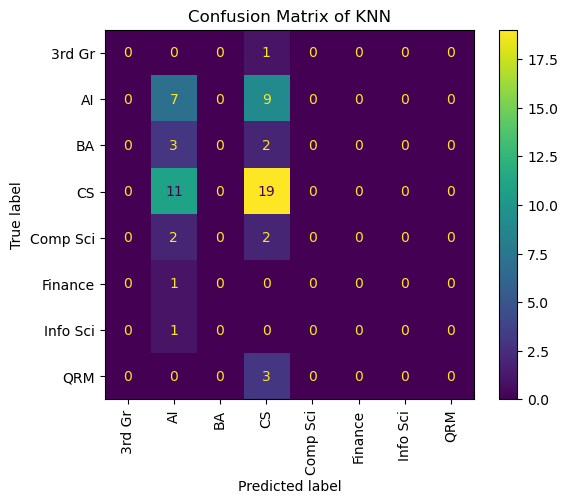

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif , chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('new_data_fill_missing_linear&mode.csv')

# Check for missing values
# print(data.isnull().sum())

# Drop missing values
data = data.dropna()

# Separate target variable and feature variables
target = data['programme']
data = data.drop(['programme',"Tijdstempel",'random_number','good_day_(1)',
                  'good_day_(2)','birthday','bed_time'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'knn__n_neighbors': range(1, 31),  # number of neighbors to include in the majority of the voting process
    'knn__weights': ['uniform', 'distance'],  # weight function to use in prediction
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # algorithm to use for nearest neighbors search
    'knn__p': [1, 2],  # power parameter for Minkowski metric
    'select__k': [2, 3, 4]  # select the best 2, 3, or 4 features
}

# Create a pipeline to select the best features and train the KNN model
pipeline = Pipeline([
#     ('select', SelectKBest(f_classif)),
    ('select', SelectKBest(score_func=chi2, k=5)),
    ('knn', KNeighborsClassifier())
])

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Print the selected features and their p-values
selected_features = grid_search.best_estimator_.named_steps['select'].get_support()
p_values = grid_search.best_estimator_.named_steps['select'].pvalues_
feature_names = data.columns

print("\nSelected Features:")
for i, feature in enumerate(feature_names[selected_features]):
    print(f"{feature}: {p_values[i]}")

# Evaluate the performance on the test set using the best hyperparameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Test set accuracy:", accuracy)
print("Test set F1 score:", f1)

# Plot the confusion matrix
plot_confusion_matrix(grid_search, X_test, y_test, xticks_rotation='vertical')
plt.title("Confusion Matrix of KNN")

# Compute and print the confusion matrix as text
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Best hyperparameters: {'select__k': 2, 'tree__criterion': 'gini', 'tree__max_depth': 4, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 4, 'tree__splitter': 'random'}
Accuracy score: 0.42653061224489797

Selected Features:
students_in_room: 0.7505661157854693
stress_level: 0.8816419949164299
Test set accuracy: 0.4098360655737705
Test set F1 score: 0.3593590812262666

Confusion Matrix:
[[ 0  1  0  0  0  0  0  0]
 [ 0 10  0  6  0  0  0  0]
 [ 0  2  0  3  0  0  0  0]
 [ 0 15  0 15  0  0  0  0]
 [ 0  2  0  2  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]]


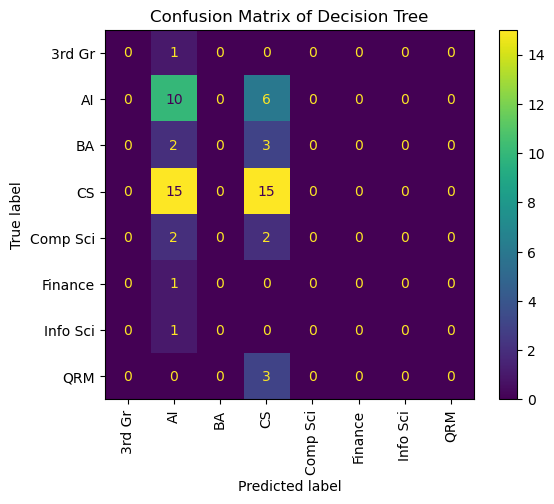

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import SelectKBest, f_classif , chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
iris = pd.read_csv('new_data_fill_missing_linear&mode.csv')

# Check for missing values
# print(iris.isnull().sum())

# Drop missing values
iris = iris.dropna()

# Separate target variable and feature variables
target = iris['programme']
iris = iris.drop(['programme',"Tijdstempel",'random_number','good_day_(1)',
                  'good_day_(2)','birthday','bed_time'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris, target, test_size=0.2, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__splitter': ['best', 'random'],
    'tree__max_depth': range(1, 10),
    'tree__min_samples_split': range(2, 10),
    'tree__min_samples_leaf': range(1, 5),
    'select__k': [2, 3, 4]  # select the best 2, 3, or 4 features
}

# Create a pipeline to select the best features and train the Decision Tree model
pipeline = Pipeline([
#     ('select', SelectKBest(f_classif)),
    ('select', SelectKBest(score_func=chi2, k=5)),
    ('tree', DecisionTreeClassifier())
])

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Print the selected features and their p-values
selected_features = grid_search.best_estimator_.named_steps['select'].get_support()
p_values = grid_search.best_estimator_.named_steps['select'].pvalues_
feature_names = iris.columns

print("\nSelected Features:")
for i, feature in enumerate(feature_names[selected_features]):
    print(f"{feature}: {p_values[i]}")


# Evaluate the performance on the test set using the best hyperparameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted') # calculate the weighted F1 score
print("Test set accuracy:", accuracy)
print("Test set F1 score:", f1)

# Plot the confusion matrix
plot_confusion_matrix(grid_search, X_test, y_test, xticks_rotation='vertical')
plt.title("Confusion Matrix of Decision Tree")

# Compute and print the confusion matrix as text
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Best hyperparameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'select__k': 2}
Accuracy score: 0.40144557823129257

Selected Features:
students_in_room: 0.7505661157854693
stress_level: 0.8816419949164299
Test set accuracy: 0.4098360655737705
Test set F1 score: 0.11089743589743589

Confusion Matrix:
[[ 0  1  0  0  0  0  0  0]
 [ 0  7  0  9  0  0  0  0]
 [ 0  3  0  2  0  0  0  0]
 [ 0 12  0 18  0  0  0  0]
 [ 0  2  0  2  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]]


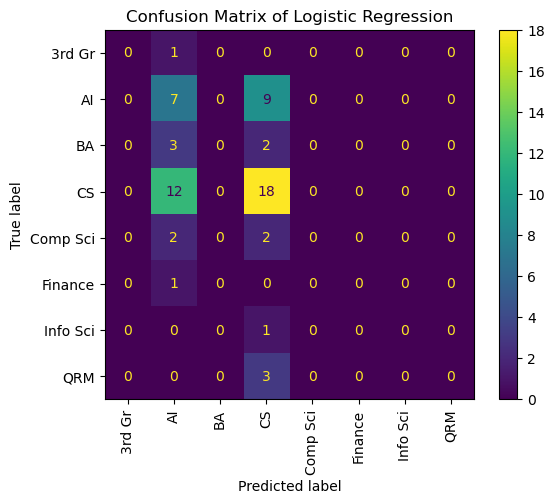

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('new_data_fill_missing_linear&mode.csv')

# Check for missing values
# print(data.isnull().sum())

# Drop missing values
data = data.dropna()

# Separate target variable and feature variables
target = data['programme']
data = data.drop(['programme', "Tijdstempel", 'random_number', 'good_day_(1)',
                  'good_day_(2)', 'birthday', 'bed_time'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # type of regularization penalty
    'logreg__C': [0.001, 0.01, 0.1, 1, 10],  # inverse of regularization strength
    'select__k': [2, 3, 4]  # select the best 2, 3, or 4 features
}

# Create a pipeline to select the best features and train the Logistic Regression model
pipeline = Pipeline([
    ('select', SelectKBest(score_func=chi2, k=5)),
    ('logreg', LogisticRegression())
])

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Print the selected features and their p-values
selected_features = grid_search.best_estimator_.named_steps['select'].get_support()
p_values = grid_search.best_estimator_.named_steps['select'].pvalues_
feature_names = data.columns

print("\nSelected Features:")
for i, feature in enumerate(feature_names[selected_features]):
    print(f"{feature}: {p_values[i]}")

# Evaluate the performance on the test set using the best hyperparameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Test set accuracy:", accuracy)
print("Test set F1 score:", f1)

# Plot the confusion matrix
plot_confusion_matrix(grid_search, X_test, y_test, xticks_rotation='vertical')
plt.title("Confusion Matrix of Logistic Regression")

# Compute and print the confusion matrix as text
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


In [17]:
data = pd.read_csv('new_data_fill_missing_linear&mode.csv')
data

Tijdstempel    programme  course_ML  course_retrieval  \
0    2023-04-04 12:16:05.346           AI        1.0               0.0   
1    2023-04-04 12:08:33.342           AI        1.0               0.0   
2    2023-04-04 12:08:36.017           AI        0.0               0.0   
3    2023-04-04 12:08:37.501           AI        0.0               0.0   
4    2023-04-04 12:08:51.909  Data Mining        1.0               1.0   
..                       ...          ...        ...               ...   
300  2023-04-04 12:13:31.269           CS        1.0               1.0   
301  2023-04-04 12:13:32.854         Exch        0.0               0.0   
302  2023-04-04 12:13:41.702           CS        1.0               0.0   
303  2023-04-04 12:14:41.914           AI        1.0               0.0   
304  2023-04-04 12:28:05.558           CS        0.0               1.0   

     course_statistics  course_databases  gender  ChatGPT    birthday   age  \
0                  1.0               0.0       1        8  1999-05-14  23.0   
1                  1.0               0.0       5        1  1997-11-23  25.0   
2                  0.0               0.0       1        8  1999-05-14  25.0   
3                  1.0               0.0       2        0  1999-05-14  26.0   
4                  1.0               1.0       1        1  1996-06-25  26.0   
..                 ...               ...     ...      ...         ...   ...   
300                0.0               1.0       1        8  2000-07-25  22.0   
301                0.0               1.0       1        0  1996-12-13  26.0   
302                1.0               0.0       2        0  1999-05-14  26.0   
303                1.0               1.0       5        0  1996-09-04  26.0   
304                1.0               1.0       2        0  1999-05-14  26.0   

     students_in_room  prev_answer_stand  stress_level  sports_per_week  \
0               100.0                0.0          50.0              1.0   
1               319.0                0.0         100.0              0.0   
2               600.0                0.0          60.0              2.0   
3               220.0                0.0          20.0              5.0   
4               100.0                0.0          50.0              5.0   
..                ...                ...           ...              ...   
300             200.0                0.0          70.0             10.0   
301             400.0                0.0          70.0              0.0   
302             150.0                0.0          10.0              5.0   
303             175.0                1.0          45.0              4.0   
304             200.0                1.0          80.0              3.0   

    random_number  bed_time               good_day_(1)  \
0               1  04:30:00                       Work   
1              69  23:30:00                      Ashes   
2              42  23:00:00                  good food   
3              17  23:30:00                     Sports   
4              12  23:00:00                        Gym   
..            ...       ...                        ...   
300            67  01:00:00                 Good meal.   
301            13  01:09:00                Productive    
302            18  04:00:00                Nice people   
303          69.   00:00:00  never before seen trauma    
304            10  22:00:00                  Good meal   

                    good_day_(2)  
0                  Relationships  
1                      Not ashes  
2                     good sleep  
3                        Friends  
4                          Piano  
..                           ...  
300                Nice weather.  
301                  Successful   
302  Educational accomplishments  
303                       you :)  
304                        Sport  

[305 rows x 18 columns]

In [26]:
# data = pd.read_csv('new_data_fill_missing_linear&mode.csv')

def one_hot_encode(df, col_name):
    one_hot = pd.get_dummies(df[col_name], prefix=col_name, prefix_sep="_")
    df = df.drop(col_name, axis=1)
    df = df.join(one_hot)
    return df

# data = one_hot_encode(data, "programme")

In [28]:
data

Tijdstempel  course_ML  course_retrieval  course_statistics  \
0    2023-04-04 12:16:05.346        1.0               0.0                1.0   
1    2023-04-04 12:08:33.342        1.0               0.0                1.0   
2    2023-04-04 12:08:36.017        0.0               0.0                0.0   
3    2023-04-04 12:08:37.501        0.0               0.0                1.0   
4    2023-04-04 12:08:51.909        1.0               1.0                1.0   
..                       ...        ...               ...                ...   
300  2023-04-04 12:13:31.269        1.0               1.0                0.0   
301  2023-04-04 12:13:32.854        0.0               0.0                0.0   
302  2023-04-04 12:13:41.702        1.0               0.0                1.0   
303  2023-04-04 12:14:41.914        1.0               0.0                1.0   
304  2023-04-04 12:28:05.558        0.0               1.0                1.0   

     course_databases  gender  ChatGPT    birthday   age  students_in_room  \
0                 0.0       1        8  1999-05-14  23.0             100.0   
1                 0.0       5        1  1997-11-23  25.0             319.0   
2                 0.0       1        8  1999-05-14  25.0             600.0   
3                 0.0       2        0  1999-05-14  26.0             220.0   
4                 1.0       1        1  1996-06-25  26.0             100.0   
..                ...     ...      ...         ...   ...               ...   
300               1.0       1        8  2000-07-25  22.0             200.0   
301               1.0       1        0  1996-12-13  26.0             400.0   
302               0.0       2        0  1999-05-14  26.0             150.0   
303               1.0       5        0  1996-09-04  26.0             175.0   
304               1.0       2        0  1999-05-14  26.0             200.0   

     ...  programme_Data Mining  programme_Digi Bus  programme_Exch  \
0    ...                      0                   0               0   
1    ...                      0                   0               0   
2    ...                      0                   0               0   
3    ...                      0                   0               0   
4    ...                      1                   0               0   
..   ...                    ...                 ...             ...   
300  ...                      0                   0               0   
301  ...                      0                   0               1   
302  ...                      0                   0               0   
303  ...                      0                   0               0   
304  ...                      0                   0               0   

    programme_Finance programme_Hum Lang Tech programme_Info Sci  \
0                   0                       0                  0   
1                   0                       0                  0   
2                   0                       0                  0   
3                   0                       0                  0   
4                   0                       0                  0   
..                ...                     ...                ...   
300                 0                       0                  0   
301                 0                       0                  0   
302                 0                       0                  0   
303                 0                       0                  0   
304                 0                       0                  0   

    programme_Neur sci  programme_P Analysis  programme_PHD  programme_QRM  
0                    0                     0              0              0  
1                    0                     0              0              0  
2                    0                     0              0              0  
3                    0                     0              0              0  
4                    0                     0              0     

In [29]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Load the dataset
data = pd.read_csv('new_data_fill_missing_linear&mode.csv')

# Fill missing values with median and mode
data['age'].fillna(data['age'].median(), inplace=True)
data['students_in_room'].fillna(data['students_in_room'].mode()[0], inplace=True)
data['prev_answer_stand'].fillna(data['prev_answer_stand'].mode()[0], inplace=True)
data['stress_level'].fillna(data['stress_level'].mode()[0], inplace=True)
data['sports_per_week'].fillna(data['sports_per_week'].mode()[0], inplace=True)

# Separate predictor variables (X) and target variable (y)
# X = data[['course_ML', 'course_retrieval', 'course_statistics', 'course_databases', 'gender', 'ChatGPT', 'age',
#          'students_in_room', 'prev_answer_stand', 'stress_level', 'sports_per_week']]
X = data['course_ML']
y = data['programme']

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()

# Check for linearity of the relationship between predictors and the log-odds of the outcome
# Residual plot
sm.graphics.plot_partregress_grid(logit_model)
plt.show()

# Check for independence of errors
# Residuals autocorrelation plot
sm.graphics.plot_acf(logit_model.resid, zero=False)
plt.show()

# Check for absence of multicollinearity
# Variance Inflation Factor (VIF) calculation
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

# Check for outliers and influential points
# Residuals plot
sm.graphics.plot_regress_exog(logit_model, 'predictor1', fig=plt.figure(figsize=(10, 6)))
plt.show()

# Check the appropriateness of the model for the data
# Deviance goodness-of-fit test
_, pvalue = stats.chisqprob(logit_model.deviance, logit_model.df_resid)
print("Deviance goodness-of-fit test p-value:", pvalue)

# Omnibus test
_, pvalue = stats.omnibus(logit_model.resid)
print("Omnibus test p-value:", pvalue)

# Evaluate other relevant model diagnostics, as needed, based on domain knowledge and context of the data

# Make predictions using the fitted model
y_pred = logit_model.predict(X)

# Evaluate the performance of the logistic regression model
# Calculate accuracy
accuracy = (y == (y_pred > 0.5)).mean()
print("Accuracy:", accuracy)

# Calculate confusion matrix
confusion_matrix = pd.crosstab(y, y_pred > 0.5)
print("Confusion Matrix:")
print(confusion_matrix)

# Calculate precision, recall, and F1-score
precision = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1])
recall = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[1][0])
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

# Interpret the coefficients of the logistic regression model
print("Coefficients:")
print(logit_model.params)

# Interpret the odds ratios of the logistic regression model
odds_ratios = np.exp(logit_model.params)
print("Odds Ratios:")
print(odds_ratios)

# Perform hypothesis tests on the coefficients
print("Coefficient Hypothesis Tests:")
print(logit_model.t_test(np.eye(len(logit_model.params))))

# Perform Wald test on a specific hypothesis
hypothesis = '(ChatGPT = 0), (course_ML + course_retrieval + course_statistics + course_databases = 0)'
print("Wald Test on Hypothesis:", hypothesis)
print(logit_model.wald_test(hypothesis))

# Perform likelihood ratio test against a reduced model
reduced_model = sm.Logit(y, X[['const', 'ChatGPT']]).fit()
print("Likelihood Ratio Test against Reduced Model:")
print(logit_model.compare_lr_test(reduced_model))


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).